In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pywt
%matplotlib inline

In [18]:
!wget = 'https://courses.openedu.ru/assets/courseware/v1/eb4d1fcf61694206fa08bec3addddb0c/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/filip-mroz-O1gHgEagQ9U-unsplash.jpg'

--2024-01-24 21:36:04--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2024-01-24 21:36:04--  https://courses.openedu.ru/assets/courseware/v1/eb4d1fcf61694206fa08bec3addddb0c/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/filip-mroz-O1gHgEagQ9U-unsplash.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 707378 (691K) [image/jpeg]
Saving to: ‘filip-mroz-O1gHgEagQ9U-unsplash.jpg.1’

filip-mroz-O1gHgEag 100%[===================>] 690.80K   889KB/s    in 0.8s    

2024-01-24 21:36:06 (889 KB/s) - ‘filip-mroz-O1gHgEagQ9U-unsplash.jpg.1’ saved [707378/707378]

FINISHED --2024-01-24 21:36:06--
Total wall clock time: 1.8s
Downloaded: 1 files, 691K in 0.8s (889 KB/s)


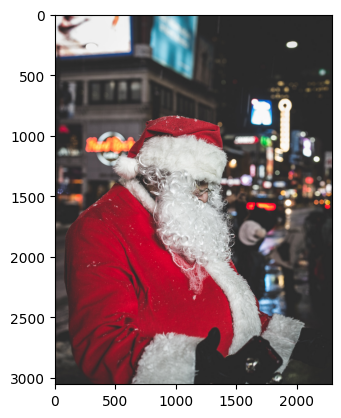

In [19]:
file_name = 'filip-mroz-O1gHgEagQ9U-unsplash.jpg'
image = cv2.imread(file_name)
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.show()

The ratio of the original width of the image to its height: 0.750
The height of the resulting compressed image: 1527


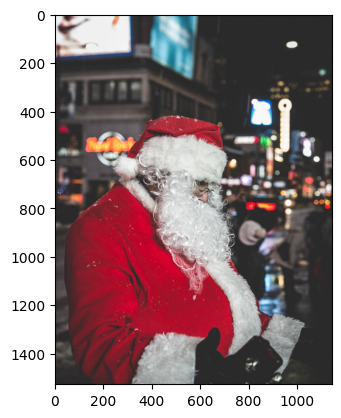

In [20]:
height, width, channels = image_RGB.shape
k = float(width) / height
print(f'The ratio of the original width of the image to its height: {k:.3f}')
new_width = 1145
dim = (new_width, int(new_width / k))
print(f'The height of the resulting compressed image: {int(new_width / k)}')
compressed_image = cv2.resize(image_RGB, dim, interpolation = cv2.INTER_AREA)
plt.imshow(compressed_image)
plt.show()

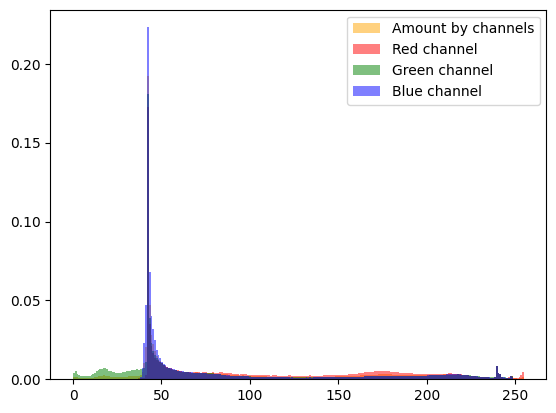

In [21]:
grayscale_hist = plt.hist(compressed_image.ravel(), bins = 256, color = 'orange', alpha = 0.5, density = True)
red_hist = plt.hist(compressed_image[:, : , 0].ravel(), bins = 256, color = 'red', alpha = 0.5, density = True)
green_hist = plt.hist(compressed_image[:, :, 1].ravel(), bins = 256, color = 'green', alpha = 0.5, density = True)
blue_hist = plt.hist(compressed_image[:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5, density = True)
plt.legend(['Amount by channels', 'Red channel', 'Green channel', 'Blue channel'])
plt.xlabel = 'Intensity $n$'
plt.ylabel = 'Frequency'
plt.show()

In [22]:
density_red = 0
density_green = 0
density_blue = 0
for i in range(0, len(red_hist[0])):
  if red_hist[0][i] > density_red:
    density_red = red_hist[0][i]
  if green_hist[0][i] > density_green:
    density_green = green_hist[0][i]
  if blue_hist[0][i] > density_blue:
    density_blue = blue_hist[0][i]
print(f'The highest density value among the three channels: {max(density_red, density_green, density_blue):.4f}')

The highest density value among the three channels: 0.2231


Intensity values for channels R,G,B: [213 217 216]


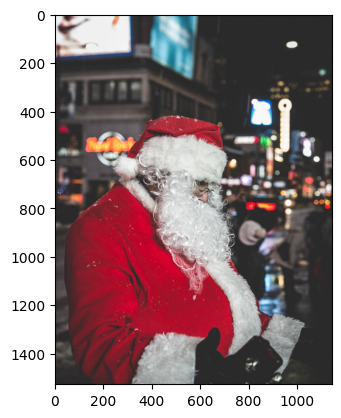

In [23]:
image_RGB_norm = compressed_image.copy()
image_RGB_norm[:, :, 0] = (image_RGB_norm[:, :, 0] - np.min(image_RGB_norm[:, :, 0])) / (np.max(image_RGB_norm[:, :, 0]) - np.min(image_RGB_norm[:, :, 0])) * 255
image_RGB_norm[:, :, 1] = (image_RGB_norm[:, :, 1] - np.min(image_RGB_norm[:, :, 1])) / (np.max(image_RGB_norm[:, :, 1]) - np.min(image_RGB_norm[:, :, 1])) * 255
image_RGB_norm[:, :, 2] = (image_RGB_norm[:, :, 2] - np.min(image_RGB_norm[:, :, 2])) / (np.max(image_RGB_norm[:, :, 2]) - np.min(image_RGB_norm[:, :, 2])) * 255
plt.imshow(image_RGB_norm)
plt.show
print(f'Intensity values for channels R,G,B: {image_RGB_norm[789, 537]}')

<function matplotlib.pyplot.show(close=None, block=None)>

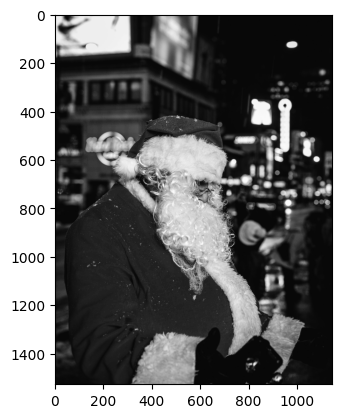

In [24]:
comp_img_gray = cv2.cvtColor(compressed_image, cv2.COLOR_RGB2GRAY)
plt.imshow(comp_img_gray, cmap = 'gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

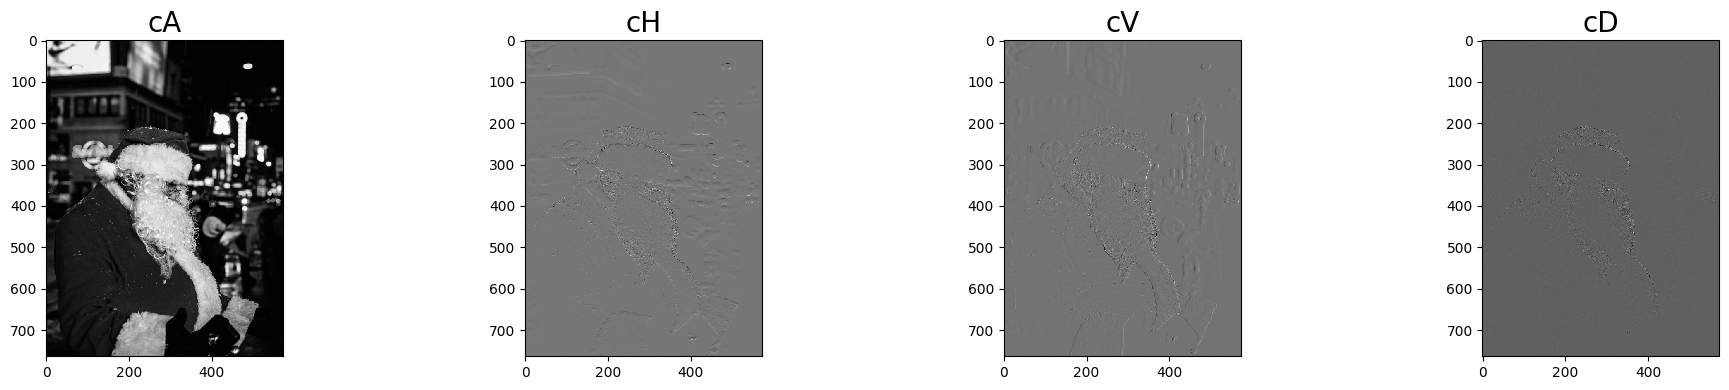

In [25]:
c = pywt.dwt2(comp_img_gray, 'haar')
cA, (cH, cV, cD) = c
titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(20, 4))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation = 'nearest', cmap = 'gray')
  ax.set_title(titles[i], fontsize = 20)
fig.tight_layout()
plt.show

In [27]:
c1 = pywt.dwt2(cA, 'haar')
cA1, (cH1, cV1, cD1) = c1

In [35]:
print('The number of zeros in the set cA1 =',sum(sum(c1[0][m] == 0) for m in range(len(c1[0]))))
print('The number of zeros in the set cH1 =',sum(sum(c1[1][0][m] == 0) for m in range(len(c1[1][0]))))
print('The number of zeros in the set cV1 =',sum(sum(c1[1][1][m] == 0) for m in range(len(c1[1][1]))))
print('The number of zeros in the set cD1 =',sum(sum(c1[1][2][m] == 0) for m in range(len(c1[1][2]))))

The number of zeros in the set cA1 = 0
The number of zeros in the set cH1 = 107146
The number of zeros in the set cV1 = 106933
The number of zeros in the set cD1 = 109222


In [38]:
print(f'Zeros in all sets: {(sum(sum(sum(c1[1][m][n] == 0) for n in range(len(c1[1][0]))) for m in range(len(c1[1])))) + sum(sum(c1[0][m] == 0) for m in range(len(c1[0])))}')

Zeros in all sets: 323301


In [37]:
threshold = 50
h1 = cA1.shape[0]
for i in range(h1):
      c1[0][i][np.abs(c1[0][i])<threshold] = 0.0
      for j in range(len(c1[1])):
         c1[1][j][i][np.abs(c1[1][j][i])<threshold] = 0.0
print('Number of zeros =',(sum(sum(sum(c1[1][m][n] == 0) for n in range(h1)) for m in range(len(c1[1])))) + sum(sum(c1[0][m] == 0) for m in range(h1)))


Number of zeros = 323301


The number of zeroed coefficients: number of zeros - zeros in all sets :(323301 - 323301 = 0)
The answer: 0